<a href="https://colab.research.google.com/github/Data-Science-and-Data-Analytics-Courses/UniMelb-A-First-Course-In-Statistical-Learning-MAST90104_2019_SM2/blob/master/assignment3/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3
*Name (ID)*: Vinh Nguyen (1029531)  
*Workshop*: Friday 04:15 PM  

---



## Setup

In [0]:
import sys
from pathlib import Path

# Notebook Library
url = "https://github.com/Data-Science-and-Data-Analytics-Courses/Notebook-Library"
repo = Path("/nblib")
!git clone "{url}" "{repo}"
if repo.parent.as_posix() not in sys.path:
  sys.path.append(repo.parent.as_posix())
%run "{repo}/.Importable.ipynb"

from nblib.imports.Basic import *
from nblib import Git

# Remote
URL = "https://github.com/Data-Science-and-Data-Analytics-Courses/UniMelb-A-First-Course-In-Statistical-Learning-MAST90104_2019_SM2"
REPO = Git.clone(URL, dest="/content")
if REPO.as_posix() not in sys.path:
  sys.path.append(REPO.as_posix())

# Working directory
os.chdir(REPO/"assignment3")

from nblib.imports.RPy import *
from setup.Setup import *

clear_output()

In [0]:
%%R

library(ggplot2)

## Problem 1
Skipped  


## Problem 2
You may not use theR glm command for this question. Fit a binomial regression model
to the O-rings data from the Challenger disaster, available in "orings.csv", using a complementary
log-log link.  
Your solution should include the following:  

(a) parameter estimates  

Complementary log-log:  
$$
\begin{align}
p = 1 - e^{-e^{\eta}}
\end{align}
$$

Log likelihood:  
$$
\begin{align}
l(\theta) &= c + \sum_{i} \left(y_i \text{log}(1 - e^{-e^{\eta_i}}) + (6-y_i) \text{log} \left(e^{-e^{\eta_i}}\right)\right) \\
&= c + \sum_{i} \left(y_i \text{log}(1 - e^{-e^{\eta_i}}) - (6-y_i) e^{\eta_i}\right)\end{align}
$$

In [0]:
%%R

# Data
df <- read.csv("orings.csv", header=TRUE)
print(head(df))
y <- df$orings.damage
x <- matrix(c(rep(1, length(df$orings.temp)), df$orings.temp), ncol=2)
print(head(x))

# cloglog link function
cloglog <- function(eta) {
    1 - exp(-exp(eta))
}

# Log-likelihood function
loglike <- function(beta, y, x) {
    eta <- x %*% beta
    return(sum(y*log(1 - exp(-exp(eta))) - (6-y)*exp(eta)))
}

print("Parameters")
bhat <- optim(c(10, -0.1), loglike, y = y, x = x,
                 control = list(fnscale = -1,reltol=1e-16))$par # fnscale= -1 -> maximize
print(bhat)

  X orings.temp orings.damage
1 1          53             5
2 2          57             1
3 3          58             1
4 4          63             1
5 5          66             0
6 6          67             0
     [,1] [,2]
[1,]    1   53
[2,]    1   57
[3,]    1   58
[4,]    1   63
[5,]    1   66
[6,]    1   67
[1] "Parameters"
[1] 10.8639010 -0.2055249


(b) 95% CIs for the parameter estimates  

[Generalized Linear Models](https://www.uio.no/studier/emner/matnat/math/STK3100/h14/lectures/lecture3.pdf) (see Expected information matrix)  

Score contribution:  
$$
\begin{align}
s_{ij} &= \frac{∂l_i}{∂β_j} = \frac{∂l_i}{∂θ_i} \frac{∂θ_i}{∂\mu_i} \frac{∂\mu_i}{∂η_i} \frac{∂η_i}{∂β_j} \\
\end{align}
$$
where:  
$$
\begin{align}
\frac{∂l_i}{∂θ_i} &= \frac{∂}{∂θ_i}\left[\frac{Y_i θ_i−b(θ_i)}{a(\phi_i)} + c(Y_i, \phi_i)\right] = \frac{Y_i − b'(θ_i)}{a(\phi_i)} = \frac{Y_i − \mu_i}{a(\phi_i)} & (\text{E}Y = b'(θ_i) = \mu_i) \\
\frac{∂θ_i}{∂\mu_i} &= \frac{1}{\frac{∂\mu_i}{∂θ_i}} = \frac{1}{\frac{∂b'(θ_i)}{∂θ_i}} = \frac{1}{b''(θ_i)} = \frac{1}{v(\mu_i)} \\
\frac{∂\mu_i}{∂η_i} &= \frac{1}{\frac{∂η_i}{∂\mu_i}} = \frac{1}{\frac{∂h(\mu_i)}{∂\mu_i}} = \frac{1}{h'(\mu_i)} & \left(η_i = g(p_i) = \text{ln}(−\text{ln}(1 − p_i))) = \text{ln}(−\text{ln}(1 − \frac{\mu_i}{6})) = h(\mu_i)\right) \\
\frac{∂η_i}{∂β_j} &= x_{ij} \\
\end{align}
$$
$$
\begin{align}
s_{ij} &= \frac{1}{a(\phi_i)} x_{ij} \frac{Y_i − \mu_i}{h'(\mu_i) v(\mu_i)} \\
\end{align}
$$

Score function:  
$$
\begin{align}
s_{j} &= \frac{∂l}{∂β_j} = \sum_{i} \left(\frac{1}{a(\phi_i)} x_{ij} \frac{Y_i − \mu_i}{h'(\mu_i) v(\mu_i)}\right) \\
\end{align}
$$

From *'Week 9 Workshop - question 9'*, under regularity conditions, such that there is an interchangeability between integration and differentiation, the log likelihood function carries the following property (expectation w.r.t $Y$):  
$$
\begin{align}
-\text{E} \frac{∂^2l}{∂β_j ∂β_k} &= \text{E}\left(\frac{∂l}{∂β_j} \frac{∂l}{∂β_k}\right) \\
&= \text{E}\left(\sum_{i} \left(\frac{1}{a(\phi_i)} x_{ij} \frac{Y_i − \mu_i}{h'(\mu_i) v(\mu_i)}\right) \sum_{i'} \left(\frac{1}{a(\phi_{i'})} x_{i'k} \frac{Y_{i'} − \mu_{i'}}{∂h'(\mu_{i'}) v(\mu_{i'})}\right)\right) \\
&= \text{E}\sum_{i} \sum_{i'} \left(\frac{1}{a(\phi_i) a(\phi_{i'})} x_{ij} x_{i'k} \frac{1}{h'(\mu_i) ∂h'(\mu_{i'}) v(\mu_i) v(\mu_{i'})} (Y_i − \mu_i) (Y_{i'} − \mu_{i'})\right) \\
&= \sum_{i} \sum_{i'} \left(\frac{1}{a(\phi_i) a(\phi_{i'})} x_{ij} x_{i'k} \frac{1}{h'(\mu_i) ∂h'(\mu_{i'}) v(\mu_i) v(\mu_{i'})} \text{E}\left[(Y_i − \mu_i) (Y_{i'} − \mu_{i'})\right]\right) \\
&= \sum_{i} \left(\frac{1}{a^2(\phi_i)} x_{ij} x_{ik} \frac{1}{h'^2(\mu_i) v^2(\mu_i)} \text{E}\left[(Y_i − \mu_i)^2\right]\right) & \left(\text{E}\left[(Y_i − \mu_i) (Y_{i'} − \mu_{i'})\right] = 0, \forall i \neq i'\right) \\
&= \sum_{i} \left(\frac{1}{a^2(\phi_i)} x_{ij} x_{ik} \frac{1}{h'^2(\mu_i) v^2(\mu_i)} \text{var}(Y_i)\right) \\
&= \sum_{i} \left(\frac{1}{a^2(\phi_i)} x_{ij} x_{ik} \frac{1}{h'^2(\mu_i) v^2(\mu_i)} v(\mu_i)a(\phi_i)\right) & (\text{var}(Y_i) = v(\mu_i)a(\phi_i)) \\
&= \sum_{i} \left(\frac{1}{a(\phi_i)} x_{ij} x_{ik} \frac{1}{h'^2(\mu_i) v(\mu_i)}\right) \\
\end{align}
$$
where:  
$$
\begin{align}
a(\phi_i) &= 1 \\
h'(\mu_i) &= -\frac{1}{6(1-p_i) \text{ln}(1-p_i)} \\
v(\mu_i) &= 6p_i(1 − p_i) \\
\end{align}
$$

Fisher Information matrix:  
$$
\begin{align}
I_{jk} &= -\text{E} \frac{∂^2l}{∂β_j ∂β_k} \\
&= \sum_{i} \left(x_{ij} x_{ik} \frac{1}{\left(\frac{1}{6(1-p_i) \text{ln}(1-p_i)}\right)^2 6p_i(1 − p_i)}\right) \\
&= \sum_{i} \left(x_{ij} x_{ik} \frac{\left(6(1-p_i) \text{ln}(1-p_i)\right)^2}{6p_i(1 − p_i)}\right) \\
&= \sum_{i} \left(x_{ij} x_{ik} \frac{6 (1-p_i) \text{ln}^2(1-p_i)}{p_i}\right) \\
&= \sum_{i} \left(6 x_{ij} x_{ik} \frac{(1-p_i) \text{ln}^2(1-p_i)}{p_i}\right) \\
\end{align}
$$


In [0]:
%%R

# Fisher Information
ehat <- x %*% bhat
phat <- cloglog(ehat)
pterm <- (1-phat) * (log(1-phat))^2 / phat # term involving p
I11 <- 6*sum(x[, 1] * x[, 1] * pterm)
I12 <- 6*sum(x[, 1] * x[, 2] * pterm)
I22 <- 6*sum(x[, 2] * x[, 2] * pterm)
fisher <- matrix(c(I11, I12, I12, I22), nrow=2, byrow=TRUE)
fisher.inv <- solve(fisher)
print(fisher.inv)

conflev <- 0.95 # confidence level
print(sprintf("%s CIs for the parameter estimates", conflev))
print(bhat + rbind(c(-1, 1), c(-1, 1)) * qnorm(1-(1-conflev)/2) * sqrt(diag(fisher.inv)))

           [,1]         [,2]
[1,]  7.4894280 -0.124053108
[2,] -0.1240531  0.002080062
[1] "0.95 CIs for the parameter estimates"
           [,1]       [,2]
[1,]  5.5001030 16.2276990
[2,] -0.2949143 -0.1161354


(c) a likelihood ratio test for the significance of the temperature coefficient  

Hypotheses:  
$$
\begin{align}
\text{H$_0$}: \beta_1 = 0 \\
\text{H$_1$}: \beta_1 \neq 0
\end{align}
$$

Models:  
$$
\begin{align}
\text{Reduced} &: \beta_r = \begin{bmatrix}
\beta_{r0} \\
\end{bmatrix} \\
\text{Full} &: \beta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix} \\
\end{align}
$$

Likelihood ratio (subscript $r$ denotes reduced model):  
$$
\begin{align}
\text{LR} &= -2 \text{ln} \frac{L_r(\hat{\beta}_{r})}{L(\hat{\beta})} & (\text{$L$ likelihood function}) \\
&= -2 \left(l_r(\hat{\beta}_{r}) - l(\hat{\beta})\right) & (\text{$l$ log-likelihood function}) \\
&= -2 \left(\left(c + \sum_{i} \left(y_i \text{log}(1 - e^{-e^{\eta_{ri}}}) - (6-y_i) e^{\eta_{ri}}\right)\right) - \left(c + \sum_{i} \left(y_i \text{log}(1 - e^{-e^{\eta_{i}}}) - (6-y_i) e^{\eta_{i}}\right)\right)\right) \\
&= -2 \left(\sum_{i} \left(y_i \text{log}(1 - e^{-e^{\eta_{ri}}}) - (6-y_i) e^{\eta_{ri}}\right) - \sum_{i} \left(y_i \text{log}(1 - e^{-e^{\eta_{i}}}) - (6-y_i) e^{\eta_{i}}\right)\right) \\
&\sim χ^2_{2-1=1} \\
\end{align}
$$
where: $\eta_{ri} = x_{ri}^T \hat{\beta}_r, \quad \eta_{i} = x_i^T \hat{\beta}$



In [0]:
%%R

print("Reduced parameters")
bhat.r <- optim(10, loglike, y = y, x = matrix(x[, 1]),
                control = list(fnscale = -1,reltol=1e-16))$par # fnscale= -1 -> maximize
print(bhat.r)

print("Likelihood ratio")
eta.r <- matrix(x[, 1]) %*% bhat.r # reduced
eta <- x %*% bhat # full
lr <- -2 * (sum(y*log(1 - exp(-exp(eta.r))) - (6-y)*exp(eta.r)) - sum(y*log(1 - exp(-exp(eta))) - (6-y)*exp(eta)))
print(lr)

print("p-value")
pval <- pchisq(lr, df=1, lower.tail=FALSE)
print(pval)

conflev <- 0.95 # confidence level
print(sprintf("Reject null at %s confidence level?", conflev))
print(pval < 1 - conflev)

[1] "Reduced parameters"
[1] -2.488098
[1] "Likelihood ratio"
[1] 22.86909
[1] "p-value"
[1] 1.734185e-06
[1] "Reject null at 0.95 confidence level?"
[1] TRUE


(d) an estimate of the probability of damage when the temperature equals 29 Fahrenheit together
with a 95% CI  



In [0]:
%%R

# log-log link inverse function
loglog.inv <- function(eta) {
    1 - exp(-exp(eta))
}

new <- c(1, 29) # new predictor
conflev <- 0.95 # confidence level
print("estimate of η")
enew <- new %*% bhat
print(enew)

print(sprintf("%s CI for η", conflev))
confint.eta <- enew + c(-1, 1) * qnorm(1-(1-conflev)/2) * sqrt(new %*% fisher.inv %*% new)
print(confint.eta)

print("estimate of probability")
probnew <- loglog.inv(enew)
print(probnew)

print(sprintf("%s CI for probability", conflev))
confint.prob <- loglog.inv(confint.eta)
print(confint.prob)

[1] "estimate of η"
        [,1]
[1,] 4.90368
[1] "0.95 CI for η"
[1] 2.101768 7.705592
[1] "estimate of probability"
     [,1]
[1,]    1
[1] "0.95 CI for probability"
[1] 0.99972 1.00000


(e) a plot comparing the fitted c-log-log model to the fitted logit model.  

[Regression diagnostic plots](https://www.andrew.cmu.edu/user/achoulde/94842/homework/regression_diagnostics.html)  
The graph below suggests that there is no significant difference between the two fitted models, the c-log-log and the logit.  


[1] "Parameters (logit model)"
[1] 11.6629893 -0.2162337


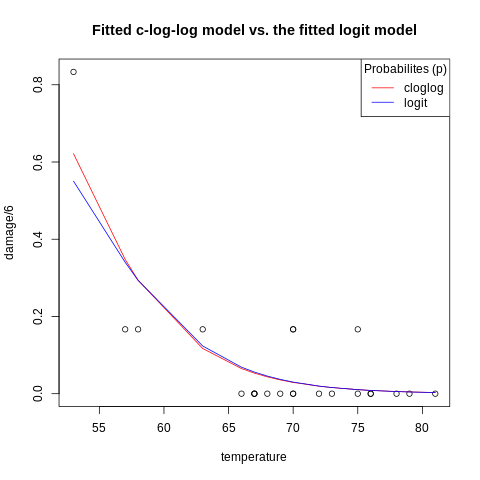

In [0]:
%%R

# Fit logit model
loglike.logit <- function(beta, y, x) {
    eta <- x %*% beta
    return(sum(y*eta - 6*log(1 + exp(eta))))
}
print("Parameters (logit model)")
bhat.logit <- optim(c(10, -0.1), loglike.logit, y = y, x = x,
                 control = list(fnscale = -1,reltol=1e-16))$par # fnscale= -1 -> maximize
print(bhat.logit)

# Logit link function
logit.inv <- function(eta) {
    1 / (1 + exp(-eta))
}

# Plot
xsorted <- x[order(x[, 2]),] # x in ascending order of temperature (column 2)
plot(y/6 ~ x[, 2], main = "Fitted c-log-log model vs. the fitted logit model", 
     xlab="temperature", ylab="damage/6") # data points
lines(xsorted[, 2], loglog.inv(xsorted %*% bhat), col="red") # probabilities of cloglog model
lines(xsorted[, 2], logit.inv(xsorted %*% bhat.logit), col="blue") # probabilities of logit model
legend("topright", title="Probabilites (p)", legend=c("cloglog", "logit"), col=c("red", "blue"), lty=1)

## Problem 3
Suppose the Y comes from an exponential family with pdf or pmf f of the form  
$$
\begin{align}
f(y; θ, φ) = \text{exp} \left[\frac{yθ − b(θ)}{a(φ)} + c(y, φ)\right] \\
\end{align}
$$


a) Show that EY = b'(θ)  

Log likelihood function:  
$$
\begin{align}
l(\theta, \phi; y) &= \text{ln} f(y; \theta, \phi) = \frac{yθ − b(θ)}{a(\phi)} + c(y, \phi)
\end{align}
$$

Under regularity conditions, such that there is an interchangeability between integration and differentiation, the log likelihood function carries the following property (expectation w.r.t $Y$):  
$$
\begin{align}
\text{E} \frac{\partial l(\theta, \phi; Y)}{\partial \theta} &= 0 \\
\Rightarrow \text{E} \frac{\partial}{\partial \theta} \left(\frac{Yθ − b(θ)}{a(\phi)} + c(Y, \phi)\right) &= 0 \\
\text{E} \left(\frac{1}{a(\phi)} \left(Y − b'(θ)\right)\right) &= 0 \\
\frac{1}{a(\phi)} \left(\text{E}Y − b'(θ)\right) &= 0 \\
\text{E}Y − b'(θ) &= 0 \\
\text{E}Y &= b'(θ) \\
\end{align}
$$
which is as required.  


(b) Show that Var Y = b''(θ)a(φ).  

Second order derivative of log likelihood function:  
$$
\begin{align}
\frac{\partial^2 l(\theta, \phi; y)}{\partial \theta^2} &= \frac{\partial^2}{\partial \theta^2} \left(\frac{yθ − b(θ)}{a(\phi)} + c(y, \phi)\right) \\
&= \frac{\partial}{\partial \theta} \left(\frac{1}{a(\phi)} \left(Y − b'(θ)\right)\right) \\
&= \frac{1}{a(\phi)} \frac{\partial}{\partial \theta} \left(Y − b'(θ)\right) \\
&= \frac{1}{a(\phi)} \left(− b''(θ)\right) \\
&= -\frac{b''(θ)}{a(\phi)} \\
\end{align}
$$

Again, under regularity conditions, the log likelihood function carries the following property (expectation w.r.t $Y$):  
$$
\begin{align}
\text{E} \frac{\partial^2 l(\theta, \phi; Y)}{\partial \theta^2} &= -\text{E} \left[\left(\frac{\partial l(\theta, \phi; Y)}{\partial \theta}\right)^2\right] \\
&= -\text{var} \left(\frac{\partial l(\theta, \phi; Y)}{\partial \theta}\right) \\
&= -\text{var} \left(\frac{1}{a(\phi)} \left(Y − b'(θ)\right)\right) \\
&= - \frac{1}{a^2(\phi)} \text{var} \left(Y − b'(θ)\right) \\
&= - \frac{1}{a^2(\phi)} \text{var}(Y) \\
\end{align}
$$

Combining the above results:  
$$
\begin{align}
\text{E} \frac{\partial^2 l(\theta, \phi; Y)}{\partial \theta^2} = \text{E} \left(-\frac{b''(θ)}{a(\phi)}\right) &= - \frac{1}{a^2(\phi)} \text{var}(Y) \\
-\frac{b''(θ)}{a(\phi)} &= -\frac{1}{a^2(\phi)} \text{var}(Y) \\
b''(θ) &= \frac{1}{a(\phi)} \text{var}(Y) \\
\text{var}(Y) &= b''(θ) a(\phi) \\
\end{align}
$$
which is as required.  


## Problem 4
Steve Sahyun of the University of Winsconsin has a website http://sahyun.net/neutron.php in
which he explains neutron activation as a means of producing radioactive metals from standard
metals. It includes data on samples of Silver (Ag), Aluminium (Al) and Copper (Cu) which have
been subject to neutron activation. For each of the elements, two samples have been tested. The
data file **Radioactive.csv** contains radioactive counts at various times after the initial measurement (with the square of time also recorded) as well as the name of the element and whether the
count is for the first or second sample.  



(a) Use qplot (in package ggplot2 ) to plot the log of counts versus time with different colours
for the different elements and different shapes for samples one and two. Your answer should
include the plot and your command to get it.  

[Plotting in Color with qplot](https://www.theanalysisfactor.com/r-programming-plotting-color-part-2-qplot/)

  Counts Time TimeSquare Material Sample
1   1867 0.00     0.0000       Ag    One
2   1575 0.50     0.2500       Ag    One
3   1379 1.02     1.0404       Ag    One
4   1134 1.52     2.3104       Ag    One
5    974 2.02     4.0804       Ag    One
6    830 2.52     6.3504       Ag    One
'data.frame':	226 obs. of  5 variables:
 $ Counts    : int  1867 1575 1379 1134 974 830 720 597 505 464 ...
 $ Time      : num  0 0.5 1.02 1.52 2.02 2.52 3.02 3.52 4.02 4.53 ...
 $ TimeSquare: num  0 0.25 1.04 2.31 4.08 ...
 $ Material  : Factor w/ 3 levels "Ag","Al","Cu": 1 1 1 1 1 1 1 1 1 1 ...
 $ Sample    : Factor w/ 2 levels "One","Two": 1 1 1 1 1 1 1 1 1 1 ...
NULL


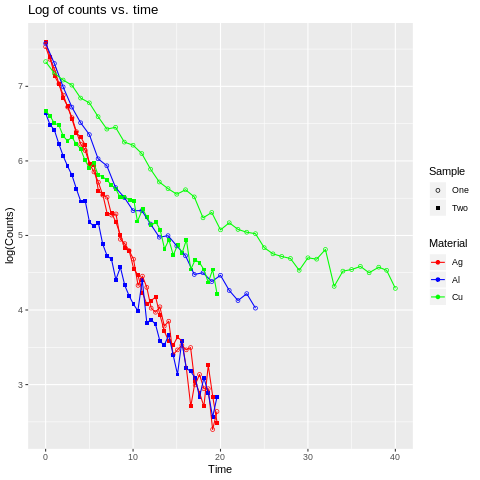

In [0]:
%%R

data <- read.csv("Radioactive.csv", header=TRUE)
print(head(data))
print(str(data))

# Plot
qplot(x=Time, y=log(Counts), data = data, main="Log of counts vs. time",
      geom = c("point", "line"), color = Material, shape = Sample) + 
scale_shape_manual(values = c(1, 15)) + 
scale_colour_manual(values = c("red","blue", "green"))

(b) Standard theory on radioactive emissions suggests that counts of them should be Poisson
distributed with a varying rate as the radioactivity decays. This suggests a Poisson model for
the counts with a log link. Comment on this in the light of the plot in (a). Fit the Poisson
model with the log the mean having a linear dependence on time and including factors for
both Material and Sample. Do diagnostic plots using plot for the model. Comment and re-fit,
if needed, omitting some observations. Use stepwise AIC selection to see if some variables can
be omitted. What does the final residual deviance indicate?  

[Poisson Regression in R](https://www.dataquest.io/blog/tutorial-poisson-regression-in-r/)  

*Comment on the use of Poisson model for the counts with a log link:*  
The graph in (a) shows that log(Counts) and time do not necessarily have a linear relationship with each other (especially for Cu and Al). However, the data points for each material and each sample tend to follow a low-order polynomial curve (not extremely far away from a straight line). Thus, it is reasonable to fit the data using a Poisson model, where the logarithm of expected values (mean) of Counts can assume a linear form of some unknown parameters.  



Call:
glm(formula = Counts ~ Time + Material + Sample, family = poisson(link = "log"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-13.431   -6.118   -2.423    3.539   37.491  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.1880545  0.0078620  914.28   <2e-16 ***
Time        -0.1541274  0.0007467 -206.40   <2e-16 ***
MaterialAl  -0.1524343  0.0100923  -15.10   <2e-16 ***
MaterialCu   0.3471989  0.0087641   39.62   <2e-16 ***
SampleTwo   -0.5774057  0.0077365  -74.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 80586  on 225  degrees of freedom
Residual deviance: 16046  on 221  degrees of freedom
AIC: 17609

Number of Fisher Scoring iterations: 5



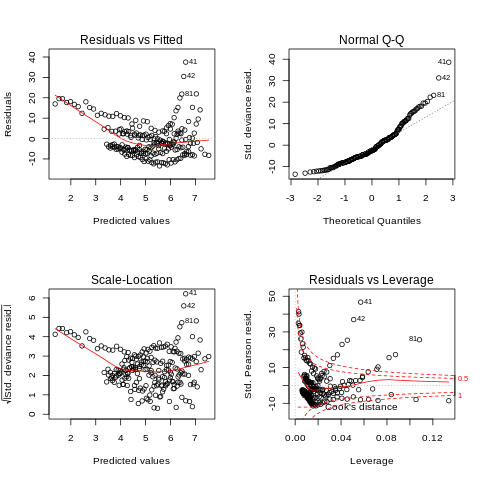

In [0]:
%%R

# Fit model
model.pois <- glm(Counts ~ Time + Material + Sample, data=data, family = poisson(link = "log"))
print(summary(model.pois))

# Diagnostic plots
par(mfrow = c(2, 2))
plot(model.pois)

*Comment on fitted model*:  
According to the diagnostic plots, the model does not seem to be a good fit for the data. For example, the 'Residuals vs Fitted' graph, with the smoothing red line not horizontal at 0, indicating that the residuals are not randomly scattered around 0. Additionally, the 'Residuals vs Leverage' graph shows a number of points with high Cook's distances (> 1) and high standardized residuals in magnitude (> 20), such as points 41, 42, 81. Since the presence of such outliers may have a significant effect on the model, one may try to improve the fitness of the model by removing these outliers.  


In [0]:
%%R

# Improve model (outliers removed)
model.impr <- glm(Counts ~ Time + Material + Sample, data=data, subset=-c(41, 42, 81), family = poisson(link = "log"))
print(summary(model.impr))

# Stepwise AIC selection
model.impr <- step(model.impr, scope=~., steps=1) # stop

# Assess fitness
print("p-value")
dev <- summary(model.impr)$deviance # residual deviance
df <- summary(model.impr)$df.residual # degrees of freedom
pval <- pchisq(dev, df, lower.tail = FALSE)
print(pval)

conflev <- 0.95
print(sprintf("Reject model at %s confidence level?", conflev))
print(pval < 1 - conflev)


Call:
glm(formula = Counts ~ Time + Material + Sample, family = poisson(link = "log"), 
    data = data, subset = -c(41, 42, 81))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-13.099   -5.461   -2.070    2.971   26.817  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept)  7.0642234  0.0083516  845.857   <2e-16 ***
Time        -0.1447225  0.0007509 -192.736   <2e-16 ***
MaterialAl  -0.1052690  0.0108855   -9.671   <2e-16 ***
MaterialCu   0.4495237  0.0091410   49.176   <2e-16 ***
SampleTwo   -0.6427469  0.0081638  -78.732   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 69453  on 222  degrees of freedom
Residual deviance: 12768  on 218  degrees of freedom
AIC: 14303

Number of Fisher Scoring iterations: 5

Start:  AIC=14303.49
Counts ~ Time + Material + Sample

           Df Deviance   AIC
<none>           12768 14303
- Mater

The re-fit model remains the same after stepwise AIC selection.  

Residual deviance (ref. [Interpreting Residual and Null Deviance in GLM R](https://stats.stackexchange.com/a/113022)):  
A low residual deviance implies that the model is a good fit, a high residual deviance indicates the otherwise. In this case, the residual deviance is quite high for a $\chi_{218}^2$. Our model, thus, cannot be considered to have well captured our data.  


(c) Try re-fitting the model including TimeSquare as an extra variable to Time but still including
Material and Sample. Carry out the additional steps in part (b). Comment on the contrast
and comparison with (b).  



Call:
glm(formula = Counts ~ Time + TimeSquare + Material + Sample, 
    family = poisson(link = "log"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-16.264   -4.973   -2.095    3.843   26.836  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.443e+00  8.197e-03  908.05   <2e-16 ***
Time        -2.531e-01  1.366e-03 -185.21   <2e-16 ***
TimeSquare   4.677e-03  4.735e-05   98.78   <2e-16 ***
MaterialAl  -1.721e-01  1.009e-02  -17.05   <2e-16 ***
MaterialCu   2.771e-01  8.891e-03   31.17   <2e-16 ***
SampleTwo   -5.231e-01  7.813e-03  -66.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 80585.6  on 225  degrees of freedom
Residual deviance:  9438.9  on 220  degrees of freedom
AIC: 11005

Number of Fisher Scoring iterations: 4

[1] "Contrasts"
   Al Cu
Ag  0  0
Al  1  0
Cu  0  1
    Two
One   0
Two   1


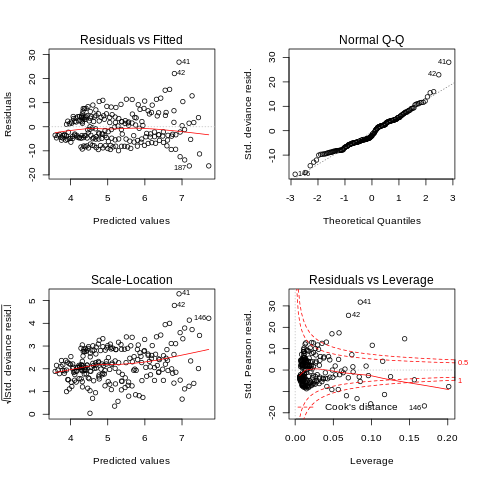

In [0]:
%%R

# Fit model with additional TimeSquare
model2.pois <- glm(Counts ~ Time + TimeSquare + Material + Sample, data=data, family = poisson(link = "log"))
print(summary(model2.pois))

# Diagnostic plots
par(mfrow = c(2, 2))
plot(model2.pois)

print("Contrasts")
print(contrasts(data$Material))
print(contrasts(data$Sample))

*Contrasts*:  
[Using and interpreting different contrasts in linear models in R](https://biologyforfun.wordpress.com/2015/01/13/using-and-interpreting-different-contrasts-in-linear-models-in-r/)  
MaterialAl (-1.721e-01): on average, estimated log(Counts) of Al is lower than that of Ag by 0.17.  
MaterialCu (2.771e-01): on average, estimated log(Counts) of Cu is higher than that of Ag by 0.27.  
SampleTwo (-5.231e-01): on average, estimated log(Counts) of Sample Two is lower than that of Sample One by 0.52.  

*Comment on fitted model with additional TimeSquare*:  
According to the diagnostic plots, there is evidence that the new model seems to be a good fit for the data (e.g, there is no obvious pattern in 'Residuals vs Fitted' graph). However, there is a few points with high Cook's distances and high standardized residuals (graph 'Residuals vs Leverage'), such as points 41, 42. Let us remove these outliers in an effort to improve the new model.  


In [0]:
%%R

# Improve model
model2.impr <- glm(Counts ~ Time + TimeSquare + Material + Sample, data=data, subset=-c(41, 42), family = poisson(link = "log"))
print(summary(model2.impr))

# Stepwise AIC selection
model2.impr <- step(model2.impr, scope=~., steps=1) # stop

# Assess fitness
print("p-value")
dev <- summary(model2.impr)$deviance # residual deviance
df <- summary(model2.impr)$df.residual # degrees of freedom
pval <- pchisq(dev, df, lower.tail = FALSE)
print(pval)

conflev <- 0.95
print(sprintf("Reject model at %s confidence level?", conflev))
print(pval < 1 - conflev)


Call:
glm(formula = Counts ~ Time + TimeSquare + Material + Sample, 
    family = poisson(link = "log"), data = data, subset = -c(41, 
        42))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-16.261   -4.752   -1.069    3.479   20.286  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept)  7.351e+00  8.693e-03  845.551  < 2e-16 ***
Time        -2.405e-01  1.410e-03 -170.528  < 2e-16 ***
TimeSquare   4.289e-03  4.915e-05   87.269  < 2e-16 ***
MaterialAl  -8.113e-02  1.045e-02   -7.766 8.12e-15 ***
MaterialCu   3.695e-01  9.297e-03   39.745  < 2e-16 ***
SampleTwo   -6.036e-01  8.154e-03  -74.030  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 73590.0  on 223  degrees of freedom
Residual deviance:  7944.2  on 218  degrees of freedom
AIC: 9491.5

Number of Fisher Scoring iterations: 4

Start:  AIC=9491.51
Counts ~ Time + TimeSq

The re-fit model with additional TimeSquare remains the same after stepwise AIC selection.  

Residual deviance is significantly lower than the previous model (with time only) for the same $\chi_{218}^2$, although it is still considerably high. This model is yet to be a good fit for the data.  


(d) An alternative approach would be to run the same analyses just using the data for one material
at a time. Do this. Comment on the comparison with (b) and (c).  



Call:
glm(formula = Counts ~ Time + TimeSquare + Sample, family = poisson(link = "log"), 
    data = data, subset = Material == "Ag")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3710  -0.5920  -0.1423   0.5316   2.2550  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.5422450  0.0119375 631.809   <2e-16 ***
Time        -0.3338026  0.0044822 -74.473   <2e-16 ***
TimeSquare   0.0043695  0.0003232  13.519   <2e-16 ***
SampleTwo   -0.0021546  0.0122973  -0.175    0.861    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 39933.421  on 79  degrees of freedom
Residual deviance:    74.426  on 76  degrees of freedom
AIC: 615.83

Number of Fisher Scoring iterations: 4



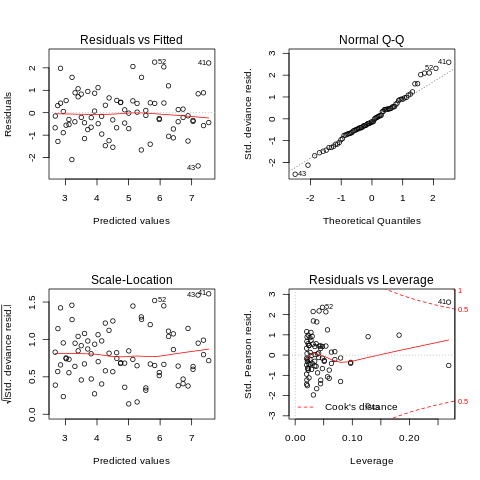

In [0]:
%%R

# Model with additional TimeSquare for Ag
modelAg <- glm(Counts ~ Time + TimeSquare + Sample, data=data, subset=Material=="Ag", family = poisson(link = "log"))
print(summary(modelAg))

# Diagnostic plots
par(mfrow = c(2, 2))
plot(modelAg)

*Comment on fitted model for Ag*:  
The diagnostic plots show that the fitted model for Ag is a relatively good fit for the data (e.g, not only there is not obvious pattern in residuals but also no outrageous outliers either. In this case, it is not necessary to remove outliers from the dataset.  


In [0]:
%%R

# Stepwise AIC selection
modelAg.impr <- step(modelAg, scope=~., steps=1) # dropped Sample
modelAg.impr <- step(modelAg.impr, scope=~. + Sample, steps=1) # stop
print(summary(modelAg.impr))

# Assess fitness
print("p-value")
dev <- summary(modelAg.impr)$deviance # residual deviance
df <- summary(modelAg.impr)$df.residual # degrees of freedom
pval <- pchisq(dev, df, lower.tail = FALSE)
print(pval)

conflev <- 0.95
print(sprintf("Reject model at %s confidence level?", conflev))
print(pval < 1 - conflev)

Start:  AIC=615.83
Counts ~ Time + TimeSquare + Sample

             Df Deviance    AIC
- Sample      1     74.5  613.9
<none>              74.4  615.8
- TimeSquare  1    245.1  784.5
- Time        1   5000.8 5540.2

Step:  AIC=613.86
Counts ~ Time + TimeSquare

Start:  AIC=613.86
Counts ~ Time + TimeSquare

             Df Deviance    AIC
<none>              74.5  613.9
+ Sample      1     74.4  615.8
- TimeSquare  1    245.1  782.5
- Time        1   5000.8 5538.2

Call:
glm(formula = Counts ~ Time + TimeSquare, family = poisson(link = "log"), 
    data = data, subset = Material == "Ag")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4101  -0.5840  -0.1237   0.5222   2.2347  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.5411682  0.0102361  736.73   <2e-16 ***
Time        -0.3338025  0.0044822  -74.47   <2e-16 ***
TimeSquare   0.0043694  0.0003232   13.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.

Although the stepwise AIC selection excluded 'SampleNumber' from the fitted model for Ag, the difference in AIC value is not significant (614 and 616). This is due to the similar radioactive counts that both samples of Ag have at various times (plot in (a) shows almost identical graphs for Ag). In general, however, this may not always be the case, that is, 'Sample' can still play an important role in distinguishing between different samples.  

In comparison to the models in b) and c), the model for Ag has a much lower residual deviance. In fact, such residual deviance value does result in a high p-value, indicating that this model is a good fit for our data.  



Call:
glm(formula = Counts ~ Time + TimeSquare + Sample, family = poisson(link = "log"), 
    data = data, subset = Material == "Al")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8912  -1.4151  -0.5218   1.1357   3.0303  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.6064459  0.0142322  534.45   <2e-16 ***
Time        -0.2914879  0.0043830  -66.50   <2e-16 ***
TimeSquare   0.0061823  0.0002374   26.05   <2e-16 ***
SampleTwo   -1.0218532  0.0162752  -62.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 21337.43  on 64  degrees of freedom
Residual deviance:   143.55  on 61  degrees of freedom
AIC: 581.56

Number of Fisher Scoring iterations: 4



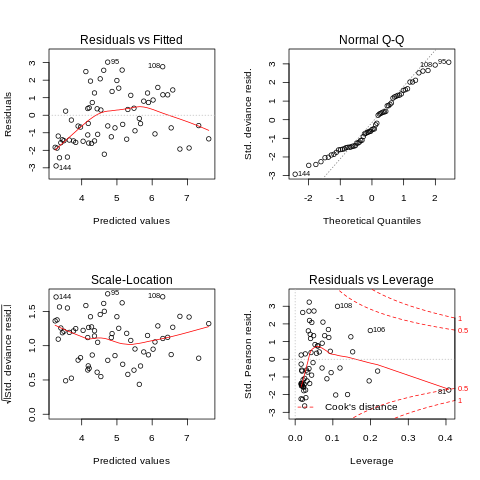

In [0]:
%%R

# Model with additional TimeSquare for Al
modelAl <- glm(Counts ~ Time + TimeSquare + Sample, data=data, subset=Material=="Al", family = poisson(link = "log"))
print(summary(modelAl))

# Diagnostic plots
par(mfrow = c(2, 2))
plot(modelAl)

*Comment on fitted model for Al*:  
The diagnostic plots show that the fitted model for Al does not seem to be a good fit for the data. Although the model exposes no outliers with Cook's distance higher than 1, it does suffer highly biased residuals.  


In [0]:
%%R

# Stepwise AIC selection
modelAl.impr <- step(modelAl, scope=~., steps=1) # stop
print(summary(modelAl.impr))

# Assess fitness
print("p-value")
dev <- summary(modelAl.impr)$deviance # residual deviance
df <- summary(modelAl.impr)$df.residual # degrees of freedom
pval <- pchisq(dev, df, lower.tail = FALSE)
print(pval)

conflev <- 0.95
print(sprintf("Reject model at %s confidence level?", conflev))
print(pval < 1 - conflev)

Start:  AIC=581.56
Counts ~ Time + TimeSquare + Sample

             Df Deviance    AIC
<none>             143.6  581.6
- TimeSquare  1    750.1 1186.1
- Sample      1   4190.7 4626.7
- Time        1   4198.6 4634.6

Call:
glm(formula = Counts ~ Time + TimeSquare + Sample, family = poisson(link = "log"), 
    data = data, subset = Material == "Al")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8912  -1.4151  -0.5218   1.1357   3.0303  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.6064459  0.0142322  534.45   <2e-16 ***
Time        -0.2914879  0.0043830  -66.50   <2e-16 ***
TimeSquare   0.0061823  0.0002374   26.05   <2e-16 ***
SampleTwo   -1.0218532  0.0162752  -62.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 21337.43  on 64  degrees of freedom
Residual deviance:   143.55  on 61  degrees of freedom
AIC: 581.5

The model for Al remains the same after stepwise AIC selection.  

In comparison to the models in b) amd c), the model for Al has a somewhat lower residual deviance. However, the p-value is still insignificant that this model cannot be regarded as a seemingly good fit.  



Call:
glm(formula = Counts ~ Time + TimeSquare + Sample, family = poisson(link = "log"), 
    data = data, subset = Material == "Cu")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5090  -0.8127   0.1135   0.8406   2.6154  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.386e+00  1.235e-02  597.97   <2e-16 ***
Time        -1.443e-01  2.021e-03  -71.38   <2e-16 ***
TimeSquare   1.765e-03  6.418e-05   27.50   <2e-16 ***
SampleTwo   -7.327e-01  1.272e-02  -57.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 18202.06  on 80  degrees of freedom
Residual deviance:   121.83  on 77  degrees of freedom
AIC: 720.35

Number of Fisher Scoring iterations: 4



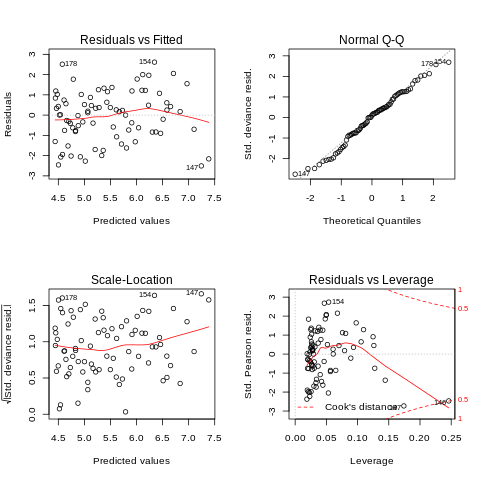

In [0]:
%%R

# Model with additional TimeSquare for Cu
modelCu <- glm(Counts ~ Time + TimeSquare + Sample, data=data, subset=Material=="Cu", family = poisson(link = "log"))
print(summary(modelCu))

# Diagnostic plots
par(mfrow = c(2, 2))
plot(modelCu)

*Comment on fitted model for Cu*:  
The diagnostic plots show that the fitted model for Cu could be a good fit for the data, in terms of pattern-free residuals and no remarkable outliers.  


In [0]:
%%R

# Stepwise AIC selection
modelCu.impr <- step(modelCu, scope=~., steps=1) # stop
print(summary(modelCu.impr))

# Assess fitness
print("p-value")
dev <- summary(modelCu.impr)$deviance # residual deviance
df <- summary(modelCu.impr)$df.residual # degrees of freedom
pval <- pchisq(dev, df, lower.tail = FALSE)
print(pval)

conflev <- 0.95
print(sprintf("Reject model at %s confidence level?", conflev))
print(pval < 1 - conflev)

Start:  AIC=720.35
Counts ~ Time + TimeSquare + Sample

             Df Deviance    AIC
<none>             121.8  720.3
- TimeSquare  1    808.1 1404.7
- Sample      1   3424.3 4020.8
- Time        1   4843.0 5439.5

Call:
glm(formula = Counts ~ Time + TimeSquare + Sample, family = poisson(link = "log"), 
    data = data, subset = Material == "Cu")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5090  -0.8127   0.1135   0.8406   2.6154  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.386e+00  1.235e-02  597.97   <2e-16 ***
Time        -1.443e-01  2.021e-03  -71.38   <2e-16 ***
TimeSquare   1.765e-03  6.418e-05   27.50   <2e-16 ***
SampleTwo   -7.327e-01  1.272e-02  -57.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 18202.06  on 80  degrees of freedom
Residual deviance:   121.83  on 77  degrees of freedom
AIC: 720.3

The model for Cu remains the same after stepwise AIC selection.  

In comparison to the models in b) amd c), the model for Cu has a lower residual deviance. Despite the improved residual deviance value, the model fails to stand against the fitness test due to an insignificant p-value.  


In general, the alternative approach, in which the Material is considered separately, has proved to result in better fitness of the models, measured by lower residual deviance values. This improvement may be a reflection of the fact that different materials have different physical properties, thus react differently to radiation. Hence, it is plausible to build a distinct model for each material.  
